In [1]:
%load_ext IPython.extensions.autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('../..')
from model import FinData
from model import train_valid_split
from model import CatboostFinModel
from backtests import Backtest

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pandas as pd

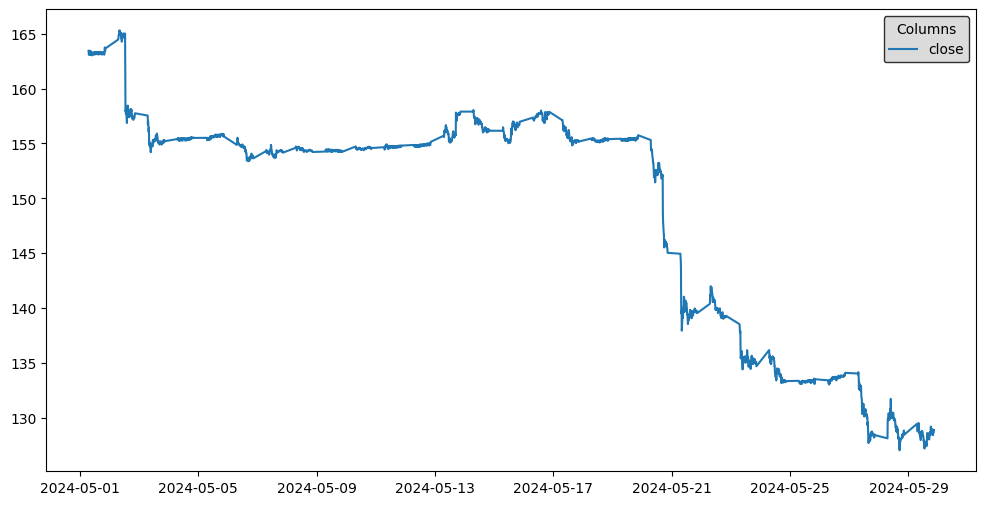

In [95]:
a = FinData("../../datasets/Gazprom_10_min.csv")
a.visualize_time_frame(dt.datetime(2024, 5, 1), dt.datetime(2024, 5, 30), columns=["close"])

In [81]:
a = FinData("../../datasets/MMK_10_min.csv")
a.restrict_time_down(dt.datetime(2024, 10, 12))
b = FinData("../../datasets/MMK_1_min.csv")
b.restrict_time_down(dt.datetime(2024, 10, 12))
a.insert_small_close_shifts(b.df)


In [ ]:
a = FinData("../../datasets/MMK_10_min.csv")
a.visualize_time_frame()

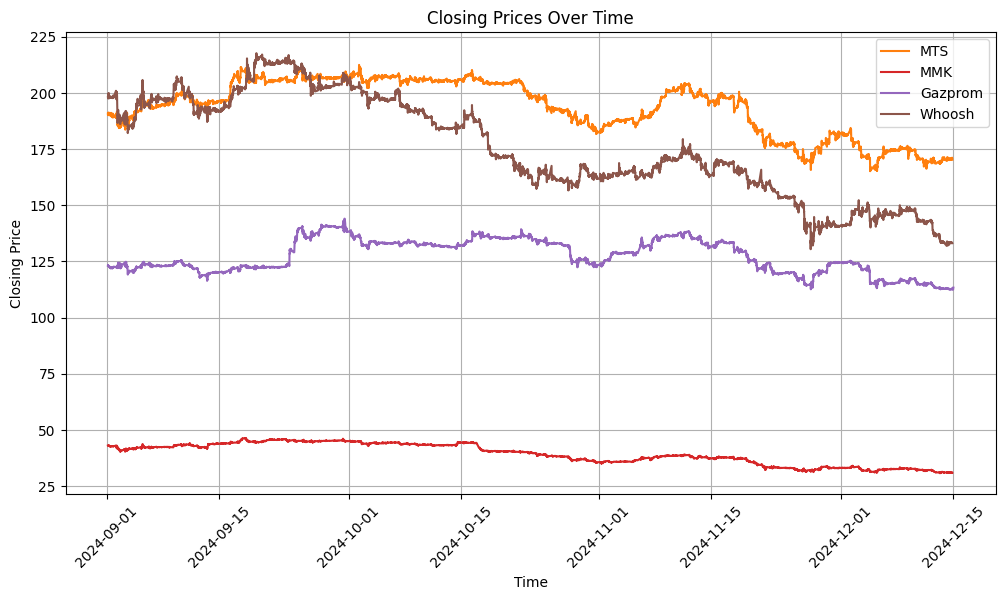

In [145]:
names = ["MTS",  "MMK", "Gazprom", "Whoosh"]
dfs = []
for stock in names:
    df = "../../datasets/" + stock + '_10_min.csv'
    data = FinData(df)
    data.restrict_time_down(dt.datetime(2024, 9, 1))
    data.restrict_time_up(dt.datetime(2024, 12, 15))
    dfs.append(data.df)


colors = ["C1", "C3", "C4", "C5"]
    

def plot_closing_prices(dfs, labels=None):
    plt.figure(figsize=(12, 6))
    
    if labels is None:
        labels = [f"Dataset {i+1}" for i in range(len(dfs))]
    
    i = 0
    for df, label in zip(dfs, labels):
        df['datetime'] = pd.to_datetime(df['utc'])
        plt.plot(df['datetime'], df['close'], label=label, color = colors[i])
        i += 1
    
    plt.xlabel("Time")
    plt.ylabel("Closing Price")
    plt.title("Closing Prices Over Time")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


plot_closing_prices(dfs, names)

In [5]:
data = FinData(df = '../../datasets/' + "Sber" + '_1_min.csv', fill_zeroes=True)
data.df

,utc,open,close,high,low,volume,direction_binary
0,2018-03-07 18:34:00,594.35,594.35,594.35,594.35,47.0,0
1,2018-03-07 18:35:00,594.35,594.25,594.35,594.35,53.0,0
2,2018-03-07 18:36:00,594.25,593.85,594.25,594.25,79.0,0
3,2018-03-07 18:37:00,593.85,593.85,593.85,593.85,112.0,0
4,2018-03-07 18:38:00,593.85,592.95,593.85,593.85,829.0,1
...,...,...,...,...,...,...,...
3587171,2024-12-31 20:45:00,686.10,686.20,686.10,686.10,18.0,0
3587172,2024-12-31 20:46:00,686.20,686.20,686.20,686.20,3.0,0
3587173,2024-12-31 20:47:00,686.20,686.10,686.20,686.20,2.0,0
3587174,2024-12-31 20:48:00,686.10,686.00,686.10,686.10,334.0,1


In [9]:

history = {"Tatneft" : [], "MTS" : [], "Yandex" : [], "MMK" : [], "Gazprom" : [], "Whoosh" : []}
names = ["Tatneft", "MTS", "Yandex", "MMK", "Gazprom", "Whoosh"]
money = 5000
for stock in names:
        end_date = dt.datetime(2024, 5, 20)
        start_date = dt.datetime(2024, 4, 10)
        st_date = dt.datetime(2024, 3, 1)
        money = 5000
        while start_date < end_date:
                args = {"iterations" : 10000, 
                        "depth" : 5, 
                        "learning_rate" : 0.01, 
                        "use_best_model" : True, 
                        "l2_leaf_reg" : 200,
                        "loss_function" : 'Logloss', 
                        "eval_metric" : 'Logloss', 
                        "class_weights" : [1, 0.4],
                        "random_state" : 42,
                        "verbose" : 500,
                        "early_stopping_rounds" : 500}

                dfs = ["../../datasets/" + stock + '_1_min.csv']
                backtest = Backtest(strategies=['long'], args=args, dfs=dfs, comissions=[0.0004])

                custom_datasets_args = {'start_dt': st_date, 
                                        'end_dt': start_date, 
                                        'train_size': dt.timedelta(days=30), 'val_size': dt.timedelta(5), 'test_size' : None}
                sm, money = backtest.test_trading(budget=money, custom_datasets_args=custom_datasets_args, proba_limit=0.5, use_PCA=False)
                st_date = st_date + dt.timedelta(days=5)
                start_date = start_date + dt.timedelta(days=5)
                history[stock].append(sm[0])

        


2025-03-06 13:15:40,174 - INFO - Backtesting started for stock - Tatnef
2025-03-06 13:15:40,186 - INFO - Train dates: 2024-03-01 07:00:00 - 2024-03-30 15:59:00 | Valid dates: 2024-03-31 07:01:00 - 2024-04-04 20:49:00 | Test dates: 2024-04-05 07:00:00 - 2024-04-09 20:49:00


0:	learn: 0.6878184	test: 0.6877280	best: 0.6877280 (0)	total: 30ms	remaining: 5m


KeyboardInterrupt: 

In [55]:
sm[0]

,datetime,budget
0,2024-12-14 04:00:00,5107.21916
1,2024-12-14 04:10:00,5107.21916
2,2024-12-14 04:20:00,5107.21916
3,2024-12-14 04:30:00,5107.21916
4,2024-12-14 04:40:00,5107.21916
...,...,...
494,2024-12-18 20:00:00,5107.21916
495,2024-12-18 20:10:00,5107.21916
496,2024-12-18 20:20:00,5107.21916
497,2024-12-18 20:30:00,5107.21916


In [58]:
history

{'Sber': [               datetime      budget
  0   2024-09-05 04:00:00  5000.00000
  1   2024-09-05 04:10:00  5000.00000
  2   2024-09-05 04:20:00  5000.00000
  3   2024-09-05 04:30:00  5000.00000
  4   2024-09-05 04:40:00  5000.00000
  ..                  ...         ...
  494 2024-09-09 20:00:00  5001.82048
  495 2024-09-09 20:10:00  5001.82048
  496 2024-09-09 20:20:00  5001.82048
  497 2024-09-09 20:30:00  5001.82048
  498 2024-09-09 20:40:00  5001.82048
  
  [499 rows x 2 columns],
                 datetime      budget
  0   2024-09-10 04:00:00  5001.82048
  1   2024-09-10 04:10:00  5001.82048
  2   2024-09-10 04:20:00  5001.82048
  3   2024-09-10 04:30:00  5001.82048
  4   2024-09-10 04:40:00  5001.82048
  ..                  ...         ...
  489 2024-09-14 20:00:00  5068.48480
  490 2024-09-14 20:10:00  5068.48480
  491 2024-09-14 20:20:00  5068.48480
  492 2024-09-14 20:30:00  5068.48480
  493 2024-09-14 20:40:00  5068.48480
  
  [494 rows x 2 columns],
                 datet

In [15]:
history

{'Sber': [                datetime      budget
  0    2024-04-05 07:00:00  5000.00000
  1    2024-04-05 07:01:00  5000.00000
  2    2024-04-05 07:02:00  5000.00000
  3    2024-04-05 07:03:00  5000.00000
  4    2024-04-05 07:04:00  5000.00000
  ...                  ...         ...
  3513 2024-04-09 20:45:00  5011.74348
  3514 2024-04-09 20:46:00  5011.74348
  3515 2024-04-09 20:47:00  5011.74348
  3516 2024-04-09 20:48:00  5011.74348
  3517 2024-04-09 20:49:00  5011.74348
  
  [3518 rows x 2 columns],
                  datetime      budget
  0    2024-04-10 07:00:00  5011.74348
  1    2024-04-10 07:01:00  5011.74348
  2    2024-04-10 07:02:00  5011.74348
  3    2024-04-10 07:03:00  5011.74348
  4    2024-04-10 07:04:00  5011.74348
  ...                  ...         ...
  3812 2024-04-14 20:45:00  5230.76676
  3813 2024-04-14 20:46:00  5230.76676
  3814 2024-04-14 20:47:00  5233.02608
  3815 2024-04-14 20:48:00  5233.02608
  3816 2024-04-14 20:49:00  5233.02608
  
  [3817 rows x 2 column

In [16]:
data = {}

In [13]:
names = ["Sber", "MTS", "Yandex", "MMK", "Gazprom", "Whoosh"]

In [17]:
for company, dfs in history.items():
        data[company] = pd.concat(dfs, ignore_index=True)


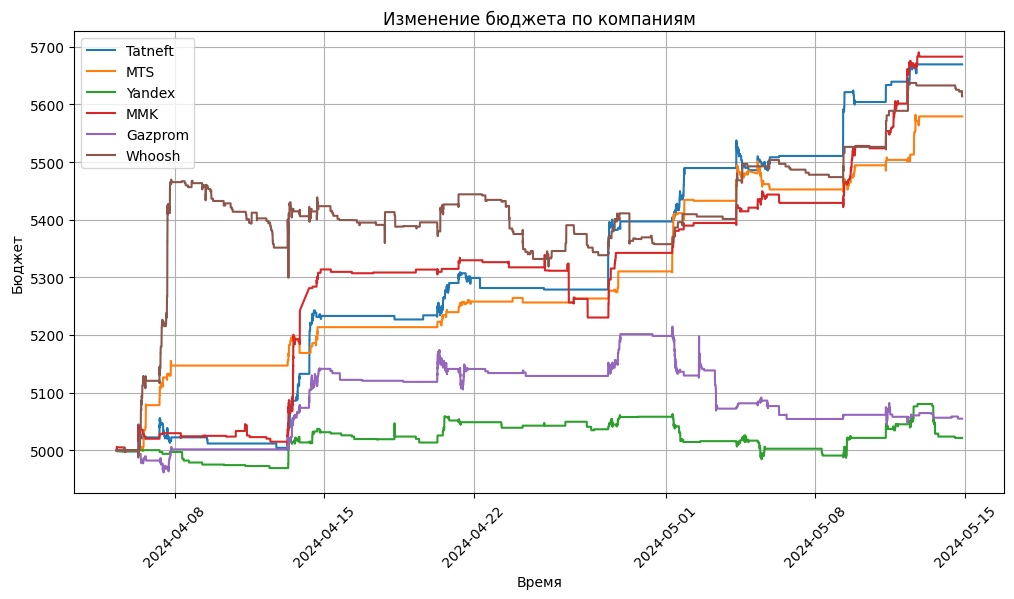

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

for i, (company, df) in enumerate(data.items()):
    if company == "Sber":
        company = "Tatneft"
    plt.plot(df["datetime"], df["budget"], label=company)

# Настройки графика
plt.xlabel("Время")
plt.ylabel("Бюджет")
plt.title("Изменение бюджета по компаниям")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
